In [1]:
# pip install pandas

In [2]:
# pip install --upgrade tensorflow

In [3]:
# pip install --upgrade keras

In [4]:
# pip install tensorflow

In [5]:
# pip install keras

In [6]:
# pip install scikit-learn

In [7]:
# pip install yfinance

In [8]:
# pip install pandas_datareader

In [9]:
# pip install numpy

In [10]:
# pip install matplotlib

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yfin
import pandas_datareader.data as web

In [12]:

start='2010-01-01'
end='2024-01-01'
yfin.pdr_override()

df = web.get_data_yahoo('GOOG', start=start, end=end)
df.head()
# print(df.tail())

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-27,28.322241,28.322241,27.570307,27.846546,27.846546,262719
2014-03-28,27.983171,28.243956,27.857019,27.922838,27.922838,824257
2014-03-31,28.266893,28.272379,27.770258,27.772251,27.772251,216593
2014-04-01,27.859013,28.344681,27.859013,28.280355,28.280355,158434
2014-04-02,29.917362,30.158699,28.032537,28.272379,28.272379,2942055


In [13]:
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500
2023-12-29,140.679993,141.434998,139.899994,140.929993,140.929993,14872700


In [14]:
# df.reset_index()

#To remove the dates and get numerical indices.

In [15]:
df=df.reset_index()
df=df.drop(['Date','Adj Close'],axis=1)

df.head()

,Open,High,Low,Close,Volume
0,28.322241,28.322241,27.570307,27.846546,262719
1,27.983171,28.243956,27.857019,27.922838,824257
2,28.266893,28.272379,27.770258,27.772251,216593
3,27.859013,28.344681,27.859013,28.280355,158434
4,29.917362,30.158699,28.032537,28.272379,2942055


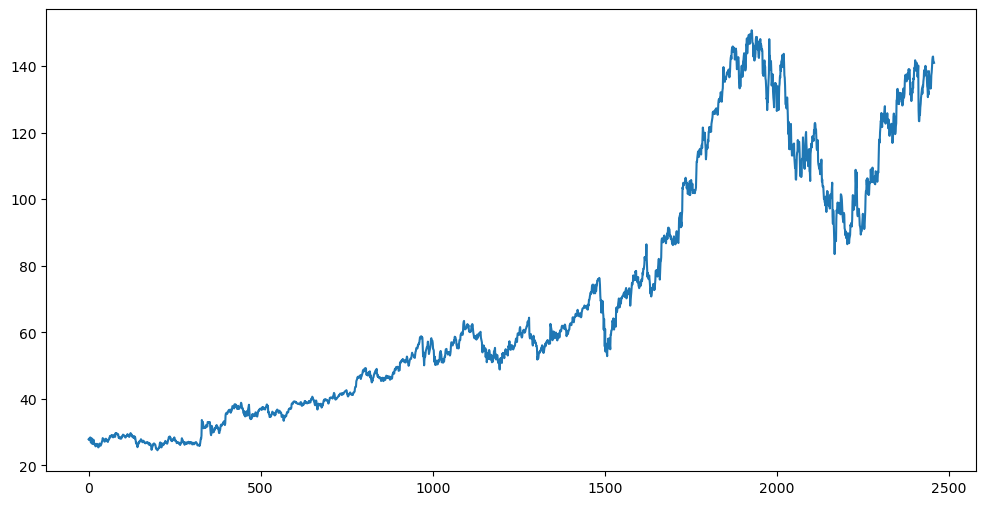

In [16]:
fig=plt.figure(figsize=(12,6))
plt.plot(df.Close)

In [17]:
df

,Open,High,Low,Close,Volume
0,28.322241,28.322241,27.570307,27.846546,262719
1,27.983171,28.243956,27.857019,27.922838,824257
2,28.266893,28.272379,27.770258,27.772251,216593
3,27.859013,28.344681,27.859013,28.280355,158434
4,29.917362,30.158699,28.032537,28.272379,2942055
...,...,...,...,...,...
2453,142.130005,143.250000,142.054993,142.720001,18494700
2454,142.979996,143.945007,142.500000,142.820007,11170100
2455,142.830002,143.320007,141.050995,141.440002,17288400
2456,141.850006,142.270004,140.828003,141.279999,12192500


In [18]:
mov_avg_100=df.Close.rolling(100).mean()
mov_avg_100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2453    134.4154
2454    134.5559
2455    134.6849
2456    134.7783
2457    134.8692
Name: Close, Length: 2458, dtype: float64

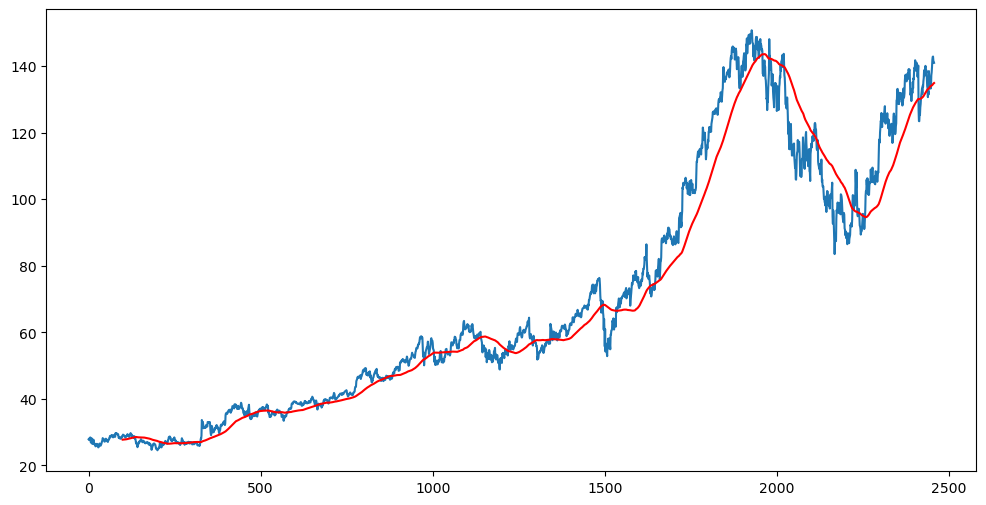

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(mov_avg_100,'r')

In [20]:
mov_avg_200=df.Close.rolling(200).mean()
mov_avg_200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2453    124.814525
2454    125.073575
2455    125.322475
2456    125.557625
2457    125.779525
Name: Close, Length: 2458, dtype: float64

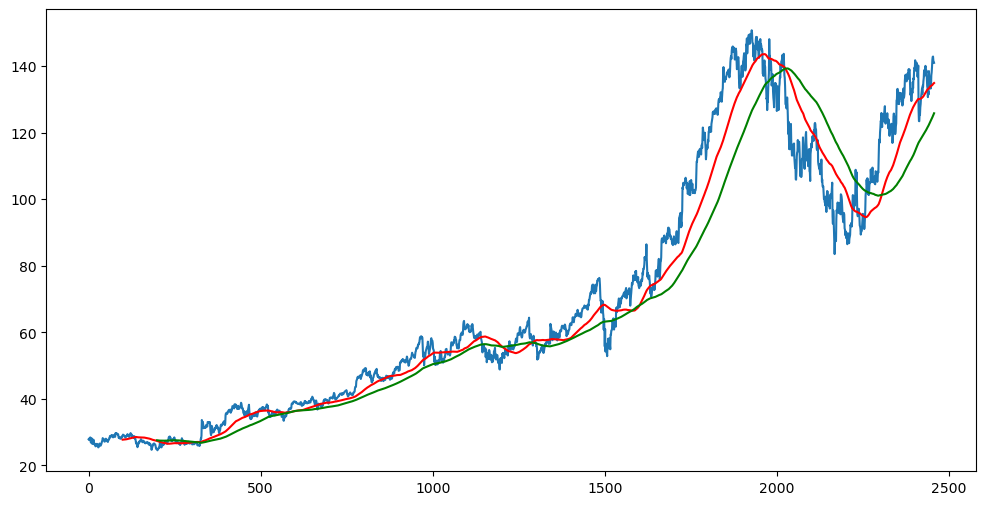

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(mov_avg_100,'r')
plt.plot(mov_avg_200,'g')

In [22]:
df.shape

(2458, 5)

In [23]:
# Lets split whole data into training and testing data.

train_data=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test_data=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(train_data.shape)
print(test_data.shape)

(1720, 1)
(738, 1)


In [24]:
print(train_data.head())

       Close
0  27.846546
1  27.922838
2  27.772251
3  28.280355
4  28.272379


In [25]:
print(test_data.head())

          Close
1720  95.862000
1721  91.539497
1722  93.155502
1723  91.787003
1724  95.067497


In [26]:
#converting this sequential data into 01 values.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [27]:
scaled_train_data=scaler.fit_transform(train_data)
scaled_train_data

array([[0.04662169],
       [0.04770396],
       [0.04556775],
       ...,
       [0.99304893],
       [1.        ],
       [0.99882971]])

In [28]:
scaled_train_data.shape

(1720, 1)

In [29]:
# now we will club 100 days data in X
x_train=[]
# and the data on day 101th in y
y_train=[]

for i in range(100,scaled_train_data.shape[0]):
    x_train.append(scaled_train_data[i-100:i])
    y_train.append(scaled_train_data[i,0])

In [30]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [31]:
x_train.shape

(1620, 100, 1)

In [32]:
y_train.shape

(1620,)

In [33]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [34]:
import tensorflow as tf

class MyClass:
  def __init__(self):
    self.seed_initializer = ...

  def my_method(self):
    self.state = tf.Variable(
        self.seed_initializer,
        shape=(2,),
        dtype="uint32",
        trainable=False,
        name="seed_generator_state",
    )

In [37]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 174ms/step - loss: 0.0695
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 0.0082
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - loss: 0.0067
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - loss: 0.0061
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - loss: 0.0056
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - loss: 0.0061
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 0.0056
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - loss: 0.0057
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - loss: 0.0046
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - loss: 0.0040
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - loss: 0.0050
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - loss: 0.0049
Epoch 13/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - loss: 0.0045
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - loss: 0.0043
Epoch 15/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - l

In [40]:
model.save('jay_stocktrend_predictionmodel.h5')

In [41]:
test_data.head()

,Close
1720,95.862000
1721,91.539497
1722,93.155502
1723,91.787003
1724,95.067497


In [45]:
train_data.tail(100)

,Close
1620,83.035500
1621,86.414001
1622,82.092003
1623,79.552002
1624,76.619499
...,...
1715,89.542999
1716,94.345001
1717,94.562500
1718,95.052498


In [46]:
past_100_days=train_data.tail(100)

In [48]:
final_df = pd.concat([past_100_days, test_data], ignore_index=True)

In [49]:
final_df.head()

,Close
0,83.035500
1,86.414001
2,82.092003
3,79.552002
4,76.619499


In [1]:
#scaling the testing data to 01 format
actual_data=scaler.fit_transform(final_df)
# actual_data

NameError: name 'scaler' is not defined

In [52]:
actual_data.shape


(838, 1)

In [56]:
#again making partition of 100 days and value of 101th day but this time for test data

x_test=[]
y_test=[]

for i in range(100,actual_data.shape[0]):
    x_test.append(actual_data[i-100:i])
    y_test.append(actual_data[i,0])



In [58]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(738, 100, 1)
(738,)


In [59]:
#making predictions now
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step


In [61]:
y_predicted.shape

(738, 1)

In [2]:
# y_test

In [3]:
# y_predicted

In [64]:
#getting the scaling factor
scaler.scale_

array([0.01250805])

In [65]:
#converting scaled data 01 back to original values from dataset.

scale_fact=1/0.01250805

y_predicted,y_test=(y_predicted*scale_fact),(y_test*scale_fact)

In [5]:
# y_predicted


In [6]:
# y_test

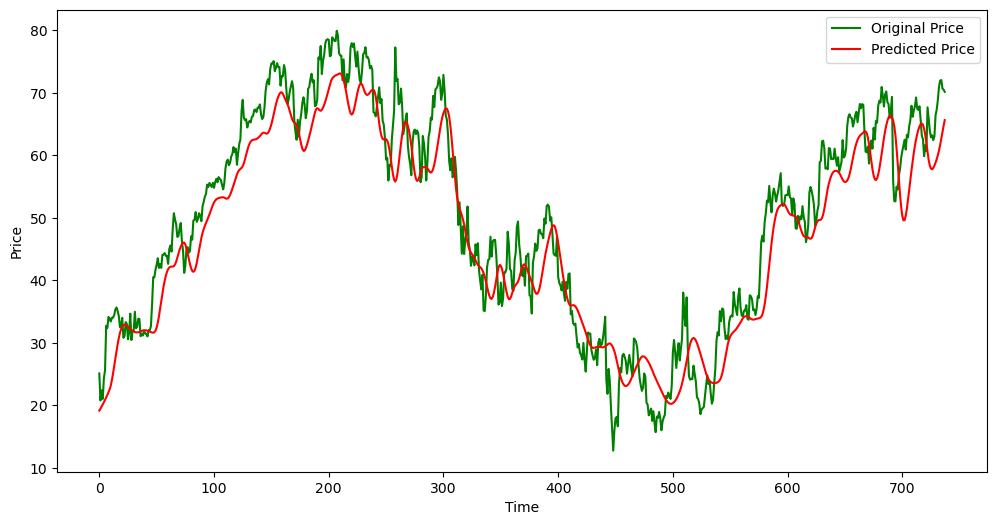

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'g',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()